In [2]:
import pandas as pd

# Corrected GitHub raw URL (removed extra dot and "blob/main")
url = "https://raw.githubusercontent.com/Mariogarber/PLN-Project/main/dataset/toxic_nontoxic/multilingual_paradetox_en.parquet"

# Load parquet file directly with pandas
df = pd.read_parquet(url)

df


,toxic_sentence,neutral_sentence
0,"then all of a sudden i see her , shes now got ...","All of a sudden i see her, she is all grown up."
1,My page should be protected first so that wort...,My page should be protected first so that unpl...
2,You made a mistake you ass.,You made a mistake.
3,"you know more than these idiots , stay the cou...","you know more than these people , stay the cou..."
4,"piss me off , fuckin jerk , get on my nerves .",get on my nerves
...,...,...
395,at least one party gives a crap about humans a...,at leas one party pays attention about humans ...
396,parliament is a lame duck .,Parliament is dull
397,"side - note , why the fuck does everything the...","side-note , why does everything the us make ha..."
398,"You're not being helpful, either, tiny-dick.","You're not being helpful, either."


In [1]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")
model = AutoModelForMaskedLM.from_pretrained("FacebookAI/xlm-roberta-base")

Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
from model.dataset.Datasets import ToxicNonToxicDataset
import pandas as pd

lang = ['en', 'am', 'ar', 'de', 'es', 'hi', 'ru', 'uk', 'zh']

url = "https://raw.githubusercontent.com/Mariogarber/PLN-Project/main/dataset/toxic_nontoxic/multilingual_paradetox_idioma.parquet"

urls = [url.replace("idioma", l) for l in lang]

dataset = ToxicNonToxicDataset(urls)

dataset.data

,toxic_sentence,neutral_sentence,language
0,साली रंडी इतना ज्ञान छोड़ रही है |,यह बेकार औरत इतना ज्ञान दे रही है |,hi
1,"Ні, та хуйня на однокласниках залишалась)","Ні, та на однокласниках залишалась)",uk
2,i cant believe we are even discussing crap lik...,i can't believe we are even discussing thing l...,en
3,"Апятьдвадцатьпять, курва)) ну але так уж бить,...",'А п''ять двадцять п''ять)) ну не так вже бити...,uk
4,"пишешь ни о чем, лишь говна плеснуть!","Пишешь ни о чем, лишь бы масла в огонь прыснуть",ru
...,...,...,...
3595,तेरे जैसों हरामी दलालों की पैदाईश पे ताली नहीं...,तुम्हारे जैसे बुरे लोगों पे ताली नहीं गाली देक...,hi
3596,Пісня про сесію:зззНа відміну від–Ну його на х...,Пісня про сесію:зззНа відміну від–так ну його :з,uk
3597,Die 42. Volksverarsche fürs dumm Wahl-„Volk“,Die 42. Irreführung fürs Wahl-„Volk“,de
3598,"fuck minimum security , put him in real prison .",Put him in real prison,en


# 1. Exploratory

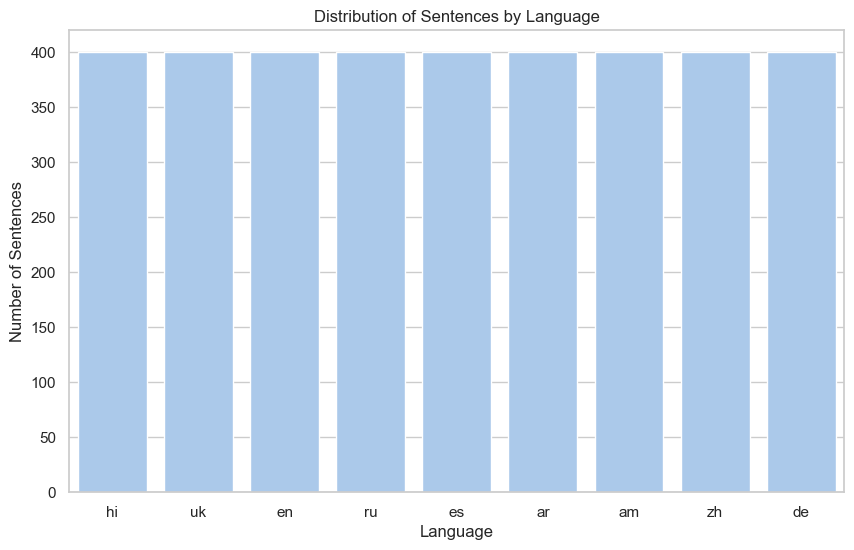

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("pastel")

fig, axs = plt.subplots(figsize=(10, 6))

sns.countplot(data=dataset.data, x='language', ax=axs)
axs.set_title('Distribution of Sentences by Language')
axs.set_xlabel('Language')
axs.set_ylabel('Number of Sentences')
plt.show()

c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4757 (\N{ETHIOPIC SYLLABLE NE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4637 (\N{ETHIOPIC SYLLABLE ME}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4613 (\N{ETHIOPIC SYLLABLE HE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mario\anaconda3\envs\nlp2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) Arial.
  fig

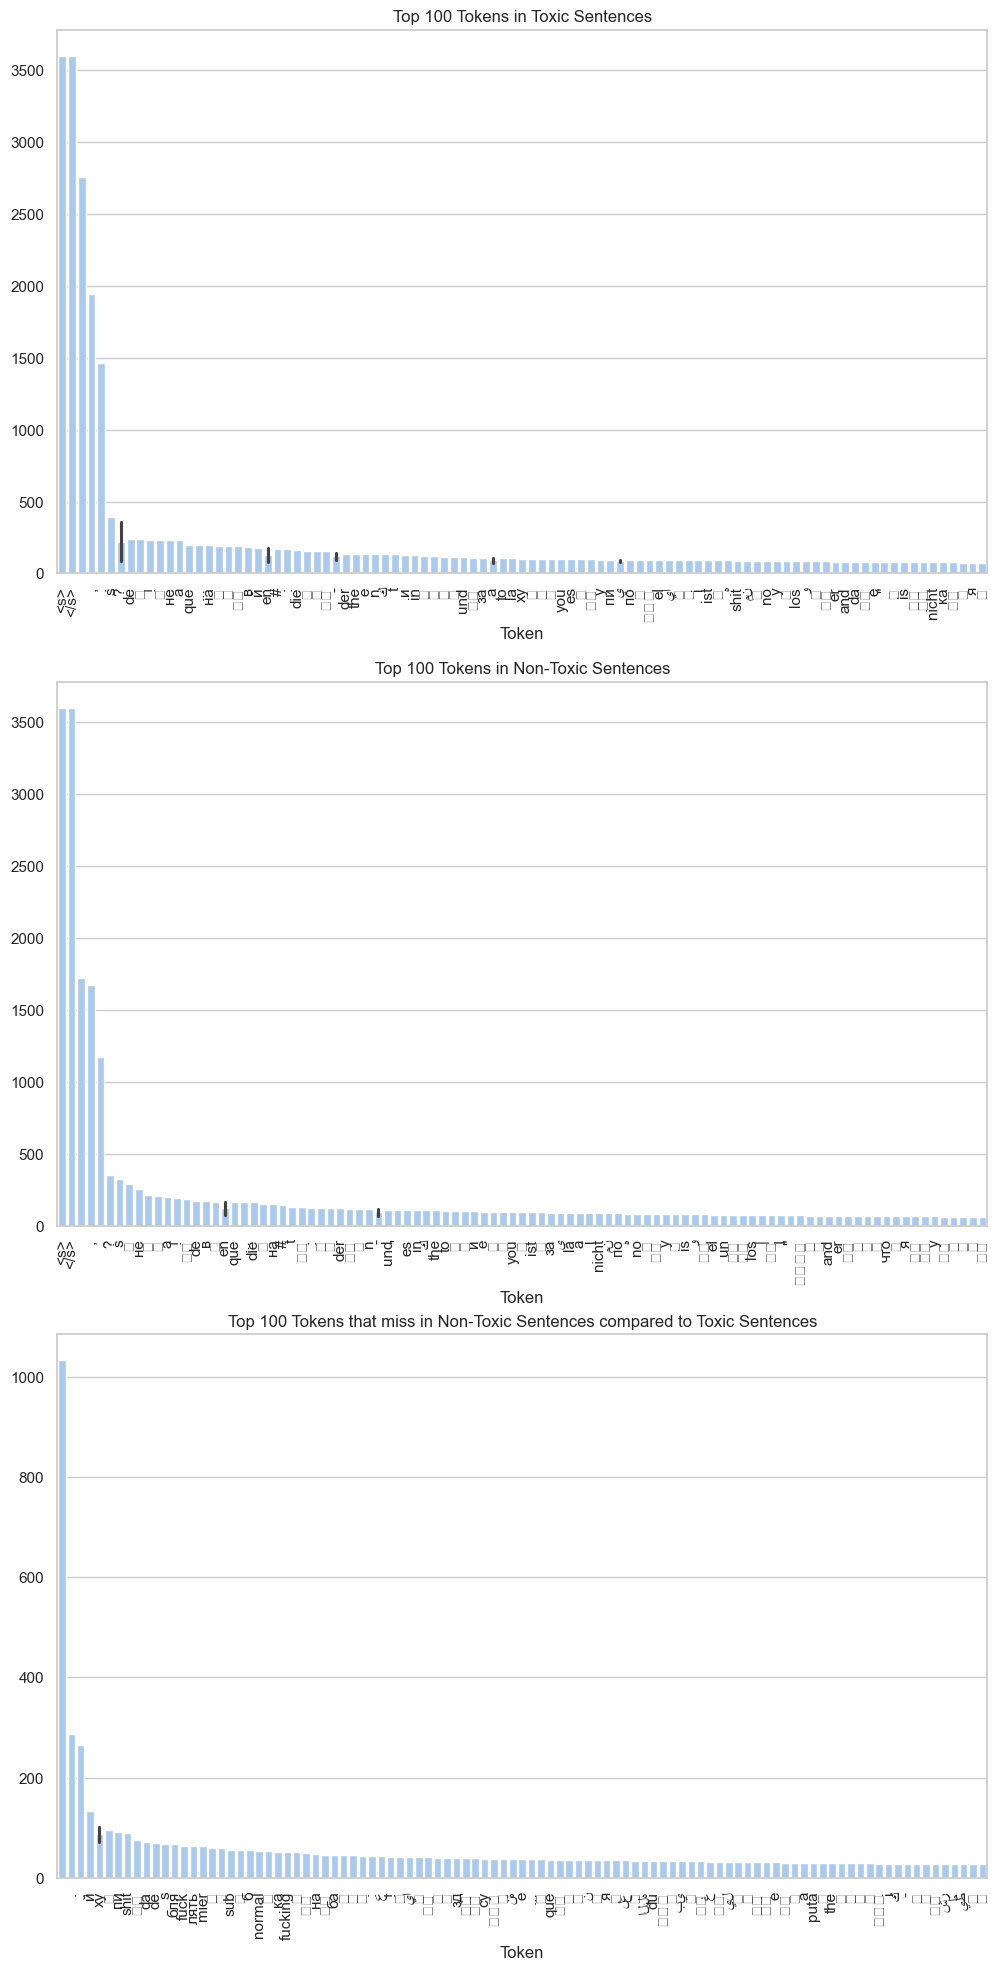

In [44]:
from collections import Counter
# apply the tokenizer to the dataset to generate a tokenized version

toxic_tokenized_data = dataset.data['toxic_sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
non_toxic_tokenized_data = dataset.data['neutral_sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# calculate the frequence of each token in the tokenized data
toxic_token_counts = Counter(token for sublist in toxic_tokenized_data for token in sublist)
non_toxic_token_counts = Counter(token for sublist in non_toxic_tokenized_data for token in sublist)

# get the difference between the two token counts
token_diff = toxic_token_counts - non_toxic_token_counts

# get the most common tokens in the difference
most_common_diff = token_diff.most_common(100)

fig, axs = plt.subplots(figsize=(12, 24), nrows=3, ncols=1)

tokens, counts = zip(*toxic_token_counts.most_common(100))
token_texts = [tokenizer.decode([token_id]) for token_id in tokens]
sns.barplot(x=token_texts, y=list(counts), ax=axs[0])
axs[0].set_title('Top 100 Tokens in Toxic Sentences')
axs[0].set_xlabel('Token')
axs[0].tick_params(axis='x', rotation=90)

tokens, counts = zip(*non_toxic_token_counts.most_common(100))
token_texts = [tokenizer.decode([token_id]) for token_id in tokens]
sns.barplot(x=token_texts, y=list(counts), ax=axs[1])
axs[1].set_title('Top 100 Tokens in Non-Toxic Sentences')
axs[1].set_xlabel('Token')
axs[1].tick_params(axis='x', rotation=90)

tokens, counts = zip(*most_common_diff)
token_texts = [tokenizer.decode([token_id]) for token_id in tokens]
sns.barplot(x=token_texts, y=list(counts), ax=axs[2])
axs[2].set_title('Top 100 Tokens that miss in Non-Toxic Sentences compared to Toxic Sentences')
axs[2].set_xlabel('Token')
axs[2].tick_params(axis='x', rotation=90)
plt.show()

There are something strange on the difference. It looks like tokes as spaces, dots and commas appears more frequently in toxic sentences than in non-toxic sentences. This happens because the embeddings of this signs not only appear on punctuation marks, they also are compute near some tokens. For example, token 6 appear before punctuation marks and before some characters on different languages. The dot appeared more in toxic sentences because they tends to be longer.

In [45]:
print(token_texts[:10])

# encode each token individually
encoded_tokens = [tokenizer.encode(token_text) for token_text in token_texts[:10]]
print(encoded_tokens)

print(tokenizer.encode("."))
print(tokenizer.decode([6]))

['', '.', ',', 'й', 'ху', 'द', 'пи', 'shit', 'चो', 'ху']
[[0, 2], [0, 6, 5, 2], [0, 6, 4, 2], [0, 3470, 2], [0, 32455, 2], [0, 8771, 2], [0, 11978, 2], [0, 93669, 2], [0, 6, 52848, 2], [0, 32455, 2]]
[0, 6, 5, 2]



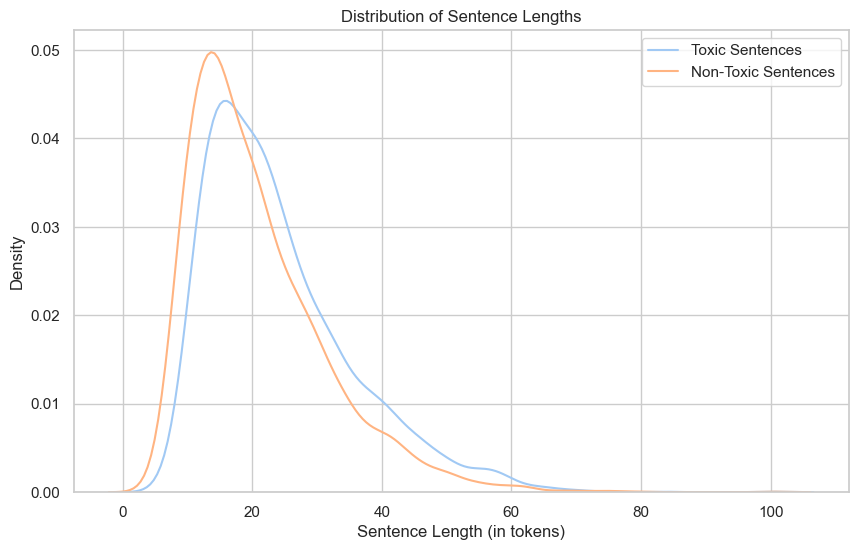

In [46]:
# Compare the lenghth of toxic and non-toxic sentences
dataset.data['toxic_length'] = dataset.data['toxic_sentence'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
dataset.data['non_toxic_length'] = dataset.data['neutral_sentence'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

fig, axs = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=dataset.data, x='toxic_length', label='Toxic Sentences', ax=axs)
sns.kdeplot(data=dataset.data, x='non_toxic_length', label='Non-Toxic Sentences', ax=axs)
axs.set_title('Distribution of Sentence Lengths')
axs.set_xlabel('Sentence Length (in tokens)')
axs.set_ylabel('Density')
axs.legend()
plt.show()

**ALERT** Posible bias because of sentence length, toxic sentences tends to be statistically longer than not-toxic sentences.

In [85]:
from scipy.stats import wasserstein_distance
import numpy as np

# Stimate the difference between both lenght distributions with wasserstein distance
toxic_lengths = dataset.data['toxic_length']
non_toxic_lengths = dataset.data['non_toxic_length']


distance = wasserstein_distance(toxic_lengths, non_toxic_lengths)
print(f"Wasserstein distance between toxic and non-toxic sentence lengths: {distance}")

# To compare the distance, subsample two random sets of toxic sentences and compute the distance between them
sample_size = min(1000, len(toxic_lengths) // 2)
sample1 = np.random.choice(toxic_lengths, size=sample_size, replace=False)
sample2 = np.random.choice(toxic_lengths, size=sample_size, replace=False)
distance_within_toxic = wasserstein_distance(sample1, sample2)
print(f"Wasserstein distance between two random samples of toxic sentence lengths: {distance_within_toxic}")

sample1_nt = np.random.choice(non_toxic_lengths, size=sample_size, replace=False)
sample2_nt = np.random.choice(non_toxic_lengths, size=sample_size, replace=False)
distance_within_non_toxic = wasserstein_distance(sample1_nt, sample2_nt)
print(f"Wasserstein distance between two random samples of non-toxic sentence lengths: {distance_within_non_toxic}")

distance_t_nt = wasserstein_distance(sample1, sample1_nt)
print(f"Wasserstein distance between random samples of toxic and non-toxic sentence lengths: {distance_t_nt}")

Wasserstein distance between toxic and non-toxic sentence lengths: 3.3447222222222224
Wasserstein distance between two random samples of toxic sentence lengths: 0.5630000000000001
Wasserstein distance between two random samples of non-toxic sentence lengths: 0.32500000000000007
Wasserstein distance between random samples of toxic and non-toxic sentence lengths: 3.5889999999999995


In [48]:
from scipy.stats import ks_2samp

# pvalor menor que 0.05 indica que las distribuciones son significativamente diferentes
ks_statistic, p_value = ks_2samp(toxic_lengths, non_toxic_lengths, alternative='two-sided')
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")


KS Statistic: 0.13555555555555557, P-value: 3.0715457505418735e-29
